###### Tried to use Machine Learning Project Checklist from the Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow. Steps are related to this!

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\my_random_projects\KNN\Rice_Cammeo_Osmancik.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
df.shape

(3810, 8)

In [4]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


##### Since count of all features are 3810, there is no nan values.
##### We can see mean and median(50%) in most features are close -> They have a normal skewed data.
##### Comparing 25% with min and 75% with max shows us there are some outliers.

#### Third Step: Explore the Data:

In [5]:
# Studying each attribute and its characteristics
df.info(), df.isnull().sum(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


(None,
 Area                 0
 Perimeter            0
 Major_Axis_Length    0
 Minor_Axis_Length    0
 Eccentricity         0
 Convex_Area          0
 Extent               0
 Class                0
 dtype: int64,
 0)

##### Hopefully no duplicate and missing values!

In [6]:
# Check percentage of frequency of the target label
df['Class'].value_counts() / df['Class'].count()

Osmancik    0.572178
Cammeo      0.427822
Name: Class, dtype: float64

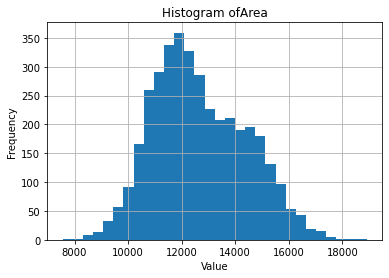

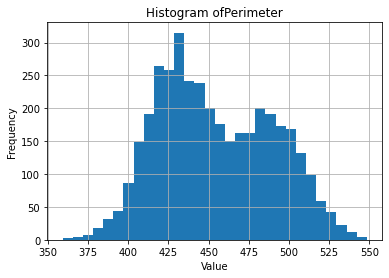

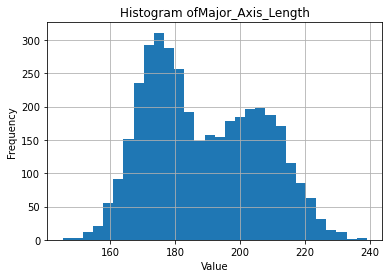

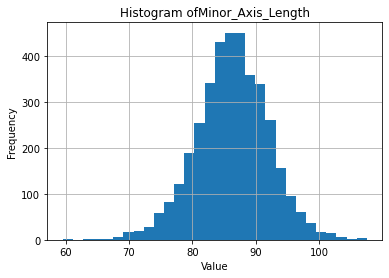

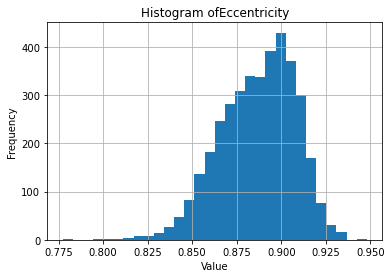

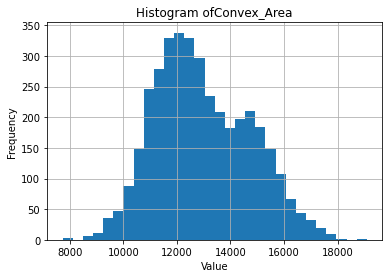

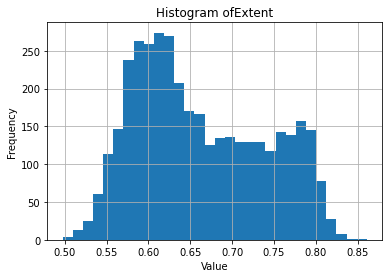

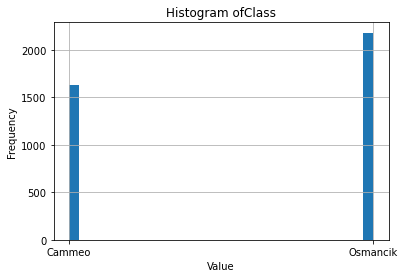

In [7]:
# Checking distribution for each feature
for cal in df.columns:
    df[cal].hist(bins=30)
    plt.title(f"Histogram of{cal}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

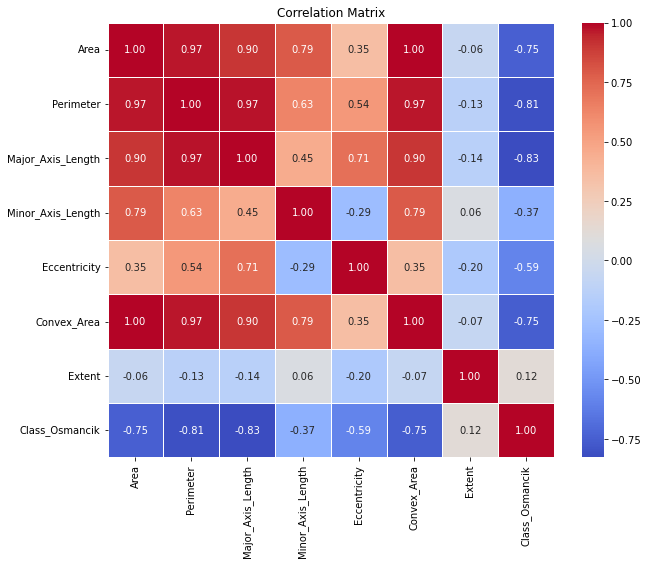

In [8]:
# Using get_dummies for encoding, Since labels have no order
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy, columns=['Class'], drop_first=True)

# Checking correlation between features and target
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Since kNN is sensetive to multicollinearity, removing some features with high correlation is important.
##### Area has high correlation with most features and those features have higher correlation with the target -> dropping Area

array([[<AxesSubplot:xlabel='Perimeter', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='Area', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='Convex_Area', ylabel='Perimeter'>],
       [<AxesSubplot:xlabel='Perimeter', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='Convex_Area', ylabel='Area'>],
       [<AxesSubplot:xlabel='Perimeter', ylabel='Convex_Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Convex_Area'>,
        <AxesSubplot:xlabel='Convex_Area', ylabel='Convex_Area'>]],
      dtype=object)

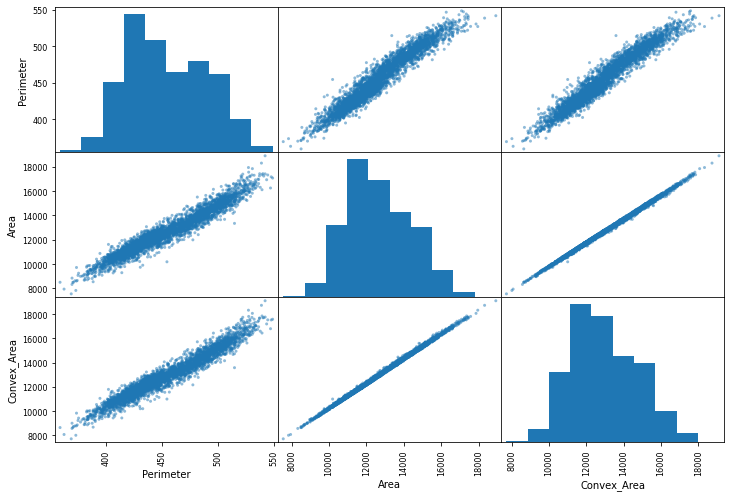

In [9]:
# Viewing linear correlation between features with high correlation
from pandas.plotting import scatter_matrix
attributes=['Perimeter', 'Area', 'Convex_Area']
scatter_matrix(df[attributes], figsize=(12,8))

In [10]:
df.drop('Area', axis=1, inplace=True)
df.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


## Train and Test split

In [11]:
X = df.drop(columns={'Class'})
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Scaling

In [12]:
# Normalizing numeric features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for col in X_train.columns:
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    X_train_scaled[col] = (X_train[col] - min_val) / (max_val - min_val)
    X_test_scaled[col] = (X_test[col] - min_val) / (max_val - min_val)


## kNN from Scratch

In [13]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

k = 7
predictions = []
# Loop through each test point
for index_test, row_test in X_test_scaled.iterrows():
    distances = []
    # Compute distance to all training points
    for index_train, row_train in X_train_scaled.iterrows():
        dist = euclidean_distance(row_test.values, row_train.values)
        label = y_train.loc[index_train]
        distances.append((dist, label))

    # Sort distances and select k nearest
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    
    # Vote
    labels = [label for _, label in k_nearest]
    predicted = Counter(labels).most_common(1)[0][0]
    predictions.append(predicted)

In [14]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=0))

Accuracy: 0.916010498687664
              precision    recall  f1-score   support

      Cammeo       0.92      0.90      0.91       350
    Osmancik       0.92      0.93      0.92       412

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.92       762
weighted avg       0.92      0.92      0.92       762

